In [13]:
import scipy.cluster.hierarchy as hac
import scipy.cluster.vq as vq
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Starting out simple – John Snow on cholera

In [14]:
deaths = pd.read_csv('cholera_deaths.txt')
pumps = pd.read_csv('cholera_pumps.txt')

In [15]:
deaths.head()

,X,Y
0,13.588010,11.095600
1,9.878124,12.559180
2,14.653980,10.180440
3,15.220570,9.993003
4,13.162650,12.963190


In [16]:
pumps.head()

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


Text(0.5, 1.0, 'John Snow s Cholera')

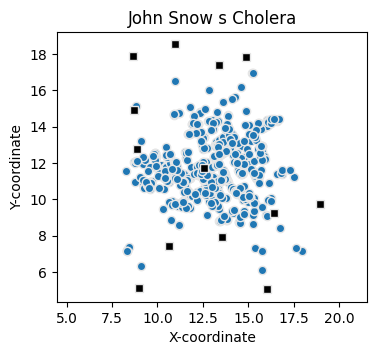

In [17]:
plt.figure(figsize=(4,3.5))
plt.plot(deaths['X'], deaths['Y'], marker='o', lw=0, mew=1, mec='0.9', ms=6)
plt.plot(pumps['X'], pumps['Y'], marker='s', lw=0, mew=1, mec='0.9', color='k', ms=6)
plt.axis('equal')
plt.xlim((4.0,22.0))
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow s Cholera')


TypeError: annotate() missing 1 required positional argument: 'text'

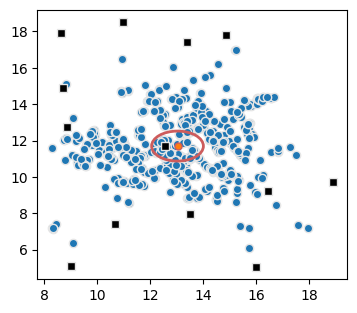

In [27]:
from matplotlib.patches import Ellipse
fig = plt.figure(figsize=(4,3.5))
ax = fig.add_subplot(111)
plt.plot(deaths['X'], deaths['Y'],
marker='o', lw=0, mew=1, mec='0.9', ms=6)
plt.plot(pumps['X'],pumps['Y'],
marker='s', lw=0, mew=1, mec='0.9', color='k', ms=6)
ellipse = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), width=deaths['X'].std(), height=deaths['Y'].std(),
                      zorder = 32, fc='None', ec='IndianRed', lw=2)
ax.add_artist(ellipse)
plt.plot(deaths['X'].mean(), deaths['Y'].mean(),'.', ms=10, mec='IndianRed', zorder=32)
for i in pumps.index:
    plt.annotate(s='{0}'.format(i), xy=(pumps[['X','Y']].loc[i]),xytext=(-15,6), textcoords='offset points')
plt.axis('equal')
plt.xlim(4.0,22.5)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow Cholera')
                

In [35]:
deaths_tmp = deaths[['X', 'Y']].values
idx_arr = np.array([], dtype='int')
for i in range(len(deaths)):
    idx_arr = np.append(idx_arr,
        (pumps.subtract(deaths_tmp[i])).apply(lambda x:x**2).sum(axis=1).apply(lambda x:x**0.5).idxmin())
deaths['C'] = idx_arr
deaths.head()

,X,Y,C
0,13.588010,11.095600,6
1,9.878124,12.559180,5
2,14.653980,10.180440,9
3,15.220570,9.993003,9
4,13.162650,12.963190,6


TypeError: annotate() missing 1 required positional argument: 'text'

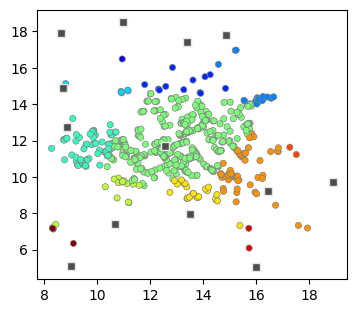

In [39]:
fig = plt.figure(figsize=(4,3.5))
ax = fig.add_subplot(111)
np.unique(deaths['C'].values)
plt.scatter(deaths['X'].values, deaths['Y'].values,
color=plt.cm.jet(deaths['C']/12.),
marker='o', lw=0.5, edgecolors='0.5', s=20)
plt.plot(pumps['X'],pumps['Y'],
marker='s', lw=0, mew=1, mec='0.9', color='0.3', ms=6)
for i in pumps.index:
    plt.annotate(s='{0}'.format(i), xy=(pumps[['X','Y']].loc[i]),
    xytext=(-15,6), textcoords='offset points', ha='right')
    ellipse = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()),
    width=deaths['X'].std(),height=deaths['Y'].std(),zorder=32, fc='None', ec='IndianRed', lw=2)
ax.add_artist(ellipse)
plt.axis('equal')
plt.xlim((4.0,22.5))
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snows Cholera')